# REAL TIME USB WEBCAM OUTPUT

In [1]:
# Import the required modules for real-time camera output
import cv2
import time
import numpy as np
import PIL.Image
from io import BytesIO
import IPython.display
import ipywidgets as widgets
import threading
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [2]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, prev_display_id=None, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    obj = IPython.display.Image(data=f.getvalue())
    if prev_display_id is not None:
        IPython.display.update_display(obj, display_id=prev_display_id)
        return prev_display_id
    else:
        return IPython.display.display(obj, display_id=True)

In [3]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    return frame

In [4]:
def get_camera_indexes(max=5):
    # ref: https://stackoverflow.com/a/53310665/3553367
    arr = []
    for index in range(0, max):
#         print(index)
        cap = cv2.VideoCapture()
        cap.open(index)
        if cap.isOpened():
            arr.append(index)
        cap.release()
    return arr
# Get Available Cameras.
camera_indexes = get_camera_indexes()
print("Camera Indices:", camera_indexes)

Camera Indices: [0]


In [5]:
def init_cam():
    cam = cv2.VideoCapture(0)
    cam.set(cv2.CAP_PROP_FRAME_WIDTH, 416)
    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 416)
    print("Camera Initiated: ", cam.get(3), cam.get(4))
    return {'cam': cam, 'displayid': None}
    
webcam = init_cam()

Camera Initiated:  352.0 288.0


Output()

FloatProgress(value=0.0, max=1.0)

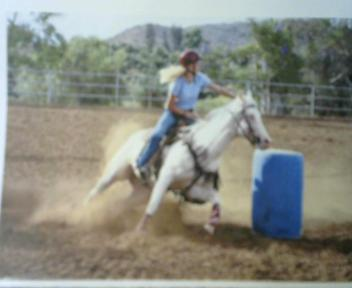

In [6]:
### Display real-time webcam feed
# Reference; real-time display

totalFrames = 500
captureImg = False

fps_output = widgets.Output()
display(fps_output)

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

curFrameNum = 0

def work(progress):
    while curFrameNum <= totalFrames:
        time.sleep(1)
        progress.value = curFrameNum / totalFrames
        
progressThread = threading.Thread(target=work, args=(progress,))
display(progress)
progressThread.start()

for curFrame in range(1, totalFrames+1):
    curFrameNum = curFrame
    t1 = time.time()
    
    # Captuer Frame
    frame = get_frame(webcam.get("cam"))
    
    # Convert the image from OpenCV BGR format to matplotlib RGB format
    # to display the image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    displayid = webcam.get('displayid')
    if displayid is not None:
        showarray(frame, displayid)
    else:
        display_handle = showarray(frame)
        webcam['displayid'] = display_handle.display_id
            
    t2 = time.time()
            
    with fps_output:
        print("Frame: %d of %d" % (curFrame, totalFrames))
        print("%f FPS" % (1/(t2-t1)))
        # Display the frame info until new frame is available
        IPython.display.clear_output(wait=True)
        

webcam.get("cam").release()

Time Elapsed: 2.9098353385925293


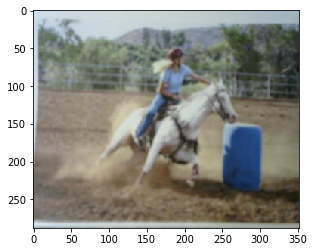

In [12]:
webcam.get("cam").release()
imgshow = None

t1 = time.time()
IPython.display.clear_output(wait=False)
savePath = 'img/camCap.jpg'
!fswebcam --no-banner --save {savePath} -d /dev/video0 2> /dev/null

image_path = savePath
image = cv2.imread(image_path)

_, ax = plt.subplots(1)
if imgshow == None:
    imgshow = ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

t2 = time.time()
print("Time Elapsed:", t2-t1)

### Save image from camera using fswebcam
```python
savePath = 'img/camCap.jpg'
%time !fswebcam --no-banner --save {savePath} -d /dev/video0 2> /dev/null

image_path = savePath
image = cv2.imread(image_path)
_, ax = plt.subplots(1)
_ = ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
```